In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Feature Scaling and Engineering
- I chose to drop key and liveness because as a human curator, I would not use these as metrics of "similarity." For example, I would not want the model to classify a live version of a song and its studio version differently. The keys did not include major or minor notation(this is covered by mode) so this was also not a metric I wished the model to differentiate on.
- I then normalized my column values to prep the dataset for clustering

In [47]:
playlist_features = pd.read_csv('csv_files/playlist_features.csv')
playlist_features.head()

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,00 all yours,0.583,0.569,7.0,-7.9775,1.0,0.03600,0.3700,0.000694,0.1110,0.5520,114.7475
1,00 alright,0.612,0.702,2.0,-5.7070,1.0,0.05280,0.0908,0.000022,0.0806,0.5020,122.8040
2,00 another dream,0.714,0.630,5.0,-6.3450,1.0,0.03630,0.1350,0.000007,0.1320,0.7775,115.9975
3,00 before you go,0.518,0.341,5.0,-9.0890,1.0,0.04115,0.6270,0.000000,0.1105,0.2330,124.1130
4,00 call it love,0.551,0.758,2.0,-7.3850,1.0,0.03520,0.0878,0.000099,0.0960,0.5470,118.0200


In [48]:
playlist_features.drop(['key', 'liveness'], axis=1)

,name,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
0,00 all yours,0.5830,0.5690,-7.9775,1.0,0.03600,0.37000,0.000694,0.5520,114.7475
1,00 alright,0.6120,0.7020,-5.7070,1.0,0.05280,0.09080,0.000022,0.5020,122.8040
2,00 another dream,0.7140,0.6300,-6.3450,1.0,0.03630,0.13500,0.000007,0.7775,115.9975
3,00 before you go,0.5180,0.3410,-9.0890,1.0,0.04115,0.62700,0.000000,0.2330,124.1130
4,00 call it love,0.5510,0.7580,-7.3850,1.0,0.03520,0.08780,0.000099,0.5470,118.0200
...,...,...,...,...,...,...,...,...,...,...
922,95 time's up,0.6095,0.7145,-6.2555,1.0,0.20800,0.06975,0.000000,0.5075,107.0790
923,96 curse the sun,0.6320,0.6625,-8.6790,1.0,0.05835,0.23200,0.005005,0.4845,115.0190
924,97 rejoice,0.6765,0.7340,-5.9230,0.5,0.12650,0.11955,0.000003,0.3460,117.5340
925,98 the shape we make,0.6030,0.5090,-6.8240,1.0,0.03410,0.37100,0.000197,0.5720,121.0320


In [49]:
pnames = playlist_features.pop('name')
for column in playlist_features.columns:
    playlist_features[column] = playlist_features[column] / playlist_features[column].abs().max()

playlist_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.722429,0.630820,0.636364,-0.482578,1.0,0.122658,0.390295,0.000968,0.342065,0.624788,0.694043
1,0.758364,0.778271,0.181818,-0.345230,1.0,0.179898,0.095781,0.000030,0.248382,0.568195,0.742772
2,0.884758,0.698448,0.454545,-0.383824,1.0,0.123680,0.142405,0.000009,0.406780,0.880023,0.701603
3,0.641884,0.378049,0.454545,-0.549815,1.0,0.140204,0.661392,0.000000,0.340524,0.263724,0.750690
4,0.682776,0.840355,0.181818,-0.446736,1.0,0.119932,0.092616,0.000138,0.295840,0.619128,0.713836


### PCA
- My scree plot indicated that 2 principal components accounted for .46 and .22 variance, whereas a 3rd component would account only for .1. Therefore I chose to use 2 principal components. These are also easier to visualize.
- I then plotted the loadings to sanity check my findings. It is sound to me that acousticness and mode affect their respective components heavily. Energy, valence, and danciness all measure the happiness/liveliness of a track, so it is logical that they are grouped together.

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=2)

pc = pd.DataFrame(pca.fit_transform(playlist_features))
pc.head()

,0,1
0,-0.073630,0.089919
1,-0.338434,0.294801
2,-0.389060,0.231462
3,0.361942,-0.029100
4,-0.336349,0.303722


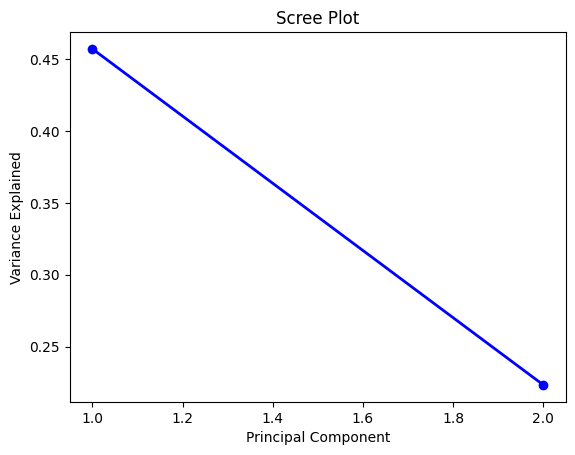

In [52]:
pc_vals = np.arange(pca.n_components_) + 1
plt.plot(pc_vals, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [53]:
loadings = pca.components_
n_features = pca.n_features_in_
feature_names = playlist_features.columns

pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
pc_loadings = dict(zip(pc_list, loadings))

loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2
feature_names,,
danceability,-0.144414,-0.043653
energy,-0.415381,0.171918
key,-0.075809,-0.174471
loudness,-0.300280,0.129384
mode,0.355707,0.902254
speechiness,-0.092477,-0.070536
acousticness,0.706087,-0.311623
instrumentalness,0.019145,-0.013107
liveness,-0.077989,0.029131


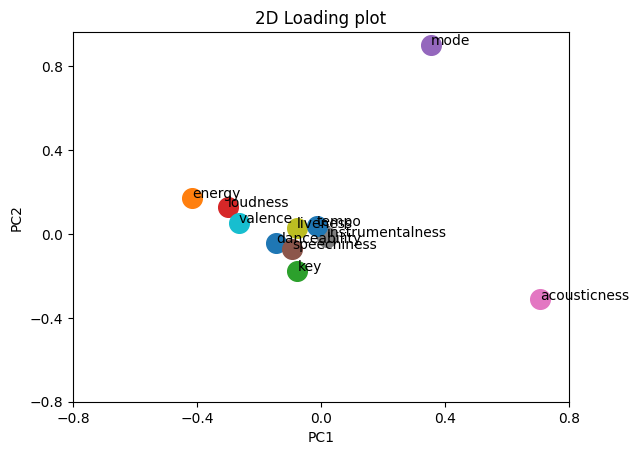

In [54]:
xs = loadings[0]
ys = loadings[1]

for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.text(xs[i], ys[i], varnames)

xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Loading plot')
plt.show()

In [55]:
pc['name'] = pnames
pc.columns = ['pc1', 'pc2', 'name']
pc.head()

,pc1,pc2,name
0,-0.073630,0.089919,00 all yours
1,-0.338434,0.294801,00 alright
2,-0.389060,0.231462,00 another dream
3,0.361942,-0.029100,00 before you go
4,-0.336349,0.303722,00 call it love


### Clustering
- I used k-medoids rather than k-means for this project because it is more resistant to outliers and actually finds an existing point as a centroid. This was useful to me because there would be no way to reverse engineer a centroid "playlist" of a k-means analysis.
- Silhouette score analysis indicated that 4 clusters gave the most distinct groupings.

In [56]:
from sklearn_extra.cluster import KMedoids as kmedoids
from sklearn.metrics import silhouette_score

In [57]:
# cluster_X = pd.concat([X, pc], axis=1, join='inner')

# X = playlist_features.drop(['key', 'mode', 'tempo', 'loudness'], axis=1).set_index('name')
X = pc.set_index('name')

In [58]:
s_scores = []

num_clusters = 1
low_score = -1
for i in range(2, 10):
    s = silhouette_score(X, kmedoids(n_clusters=i, random_state=42).fit_predict(X))
    s_scores.append(s)
    if s > low_score:
        low_score = s
        num_clusters = i

print(num_clusters)
print(s_scores)

4
[0.4977868331127143, 0.39940048687608737, 0.5462148500830815, 0.4898237031974153, 0.4529969952562739, 0.41699304644968205, 0.4124977663640285, 0.39933405677400713]


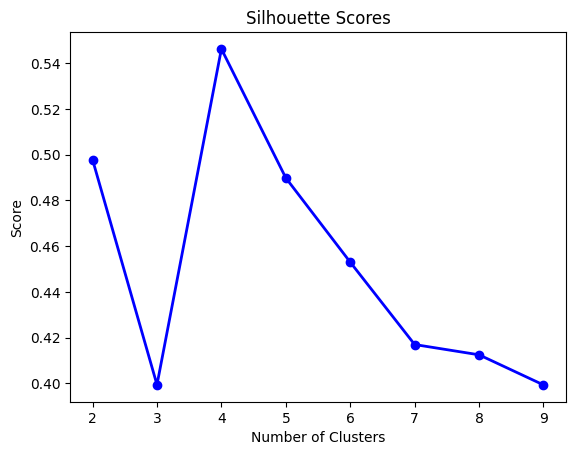

In [59]:
plt.plot(range(2, 10), s_scores, 'o-', linewidth=2, color='blue')
plt.xticks(range(2, 10))
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [60]:
km = kmedoids(n_clusters=4)
clusters = km.fit_predict(X)

clustered = X.copy().reset_index()
clustered['cluster'] = clusters

In [61]:
cluster0 = clustered.loc[clustered['cluster'] == 0]
cluster0

,name,pc1,pc2,cluster
0,00 all yours,-0.073630,0.089919,0
8,00 do you,0.019021,0.032735,0
11,00 dream about me,0.158622,0.068641,0
12,00 everything,0.078413,0.012020,0
14,00 expectations,-0.006997,0.077069,0
...,...,...,...,...
892,826 running in circles,0.016028,0.031777,0
898,831 if it's forever,0.010071,0.035072,0
902,835 maybe tomorrow,0.197231,0.008621,0
920,93 she was beautiful,0.051004,0.064646,0


### Visualization
- It seems like cluster 2 became a sort of catchall category, which I'd like to investigate further.
- I'd also like to create animated visualizations for this section, allowing users to access playlists by clicking on their points on the graph.

In [62]:
import seaborn as sns

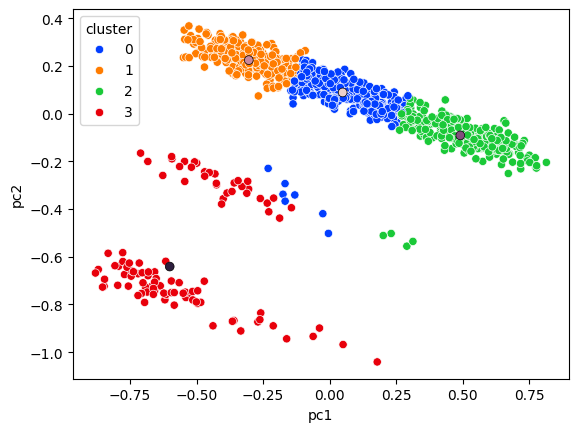

In [63]:
ax = sns.scatterplot(x='pc1', y='pc2', data=clustered, hue='cluster', palette='bright')
ax = sns.scatterplot(x= km.cluster_centers_[:, 0], y = km.cluster_centers_[:, 1], hue=range(num_clusters), s=40, ec='black', legend=False, ax=ax)

plt.show()

### Recommendation System
- I checked the centers of the clusters and was surprised to find that the central points were not highly self-similar playlists, but rather ones that I would have trouble categorizing by genre.
- The final three functions access the pc1 and pc2 scores of a playlist by name, find its cluster, and calculate its euclidean distance to every other point in the cluster. closest() returns the nearest playlist in the cluster as a title string and a url for access.

In [64]:
from scipy.spatial import distance_matrix
from sklearn.metrics.pairwise import euclidean_distances

In [65]:
playlists = pd.read_csv('csv_files/playlists.csv')
playlists.head()

,name,track_ids,track_names,id,url,image,zipp
0,00 northern stars,"['4YjjNHtEsTX6Af4mCTupT5', '77Y57qRJBvkGCUw9qs...","['Bless The Broken Road', 'In the Blood', 'Bru...",7h4ROQ5TPc1xQvZLqRm8Zb,https://open.spotify.com/playlist/7h4ROQ5TPc1x...,https://mosaic.scdn.co/640/ab67616d00001e02098...,"[('4YjjNHtEsTX6Af4mCTupT5', 'Bless The Broken ..."
1,842 what did you expect,"['0rxQTgJzd0HCUk4QUxSkjK', '1EvFahLuLZ0vSVZo8Y...","['Even If It Hurts (feat. Blood Orange)', 'Due...",0KgwFInw8xWYmtDQWayf2p,https://open.spotify.com/playlist/0KgwFInw8xWY...,https://mosaic.scdn.co/640/ab67616d00001e02145...,"[('0rxQTgJzd0HCUk4QUxSkjK', 'Even If It Hurts ..."
2,840 it falls apart,"['10cGyorRXoOc9RhVhY9Sru', '2TPy9mk2KVIwSXrqwg...","[""She's Leaving You"", 'Warmest Part of the Win...",2rARwXlp3rvRwTDnT6KXXu,https://open.spotify.com/playlist/2rARwXlp3rvR...,https://mosaic.scdn.co/640/ab67616d00001e02012...,"[('10cGyorRXoOc9RhVhY9Sru', ""She's Leaving You..."
3,841 stay true,"['45zrZUWz5XrAKk50u2N6Kl', '12UQIJePnGeLmpVReY...","['Collapse', 'Sunny day', 'Getting Older', 'Ge...",6OrcGRAMqQ3A6o2zCmqTj5,https://open.spotify.com/playlist/6OrcGRAMqQ3A...,https://image-cdn-ak.spotifycdn.com/image/ab67...,"[('45zrZUWz5XrAKk50u2N6Kl', 'Collapse'), ('12U..."
4,840 pretty woman,"['35tWhD29yvWwB0IDRr6zsL', '5sMEEjviCkH6Rp5X2Z...","['Yeah Right', 'Everything is romantic', ""Fran...",6T6cMAfk5OTqGcs3L1gUUU,https://open.spotify.com/playlist/6T6cMAfk5OTq...,https://image-cdn-ak.spotifycdn.com/image/ab67...,"[('35tWhD29yvWwB0IDRr6zsL', 'Yeah Right'), ('5..."


In [66]:
def get_centers(df, centers):
    m = distance_matrix(centers, np.asmatrix(df.to_numpy()))
    return [df.index[i] for i in np.argmin(m, axis=1)]

centers = np.array(km.cluster_centers_)
get_centers(X, centers)

['196 thunder', '260 burning', '00 change', '236 what have i done']

In [102]:
def playlist_to_coords(playlist):
    pc1 = clustered.loc[clustered["name"] == playlist]['pc1'].item()
    pc2 = clustered.loc[clustered["name"] == playlist]['pc2'].item()
    coords = np.array([pc1, pc2])
    return coords

def get_cluster(playlist):
    n = clustered[clustered['name'] == playlist]['cluster'].item()
    return clustered[clustered['cluster'] == n]

def closest(playlist):
    cluster_points = get_cluster(playlist).drop(['name', 'cluster'], axis=1)
    distances = euclidean_distances([playlist_to_coords(playlist)], cluster_points)[0]
    closest_index = np.argmin(distances)
    closest_name = clustered.iloc[closest_index]['name']
    closest_link = playlists.loc[np.where(playlists['name'] == closest_name)]['url'].item()
    return closest_name, closest_link 

In [106]:
closest('00 northern stars')

('00 everything changes',
 'https://open.spotify.com/playlist/1G0kpnYaNj9ogymT9PKFCT')